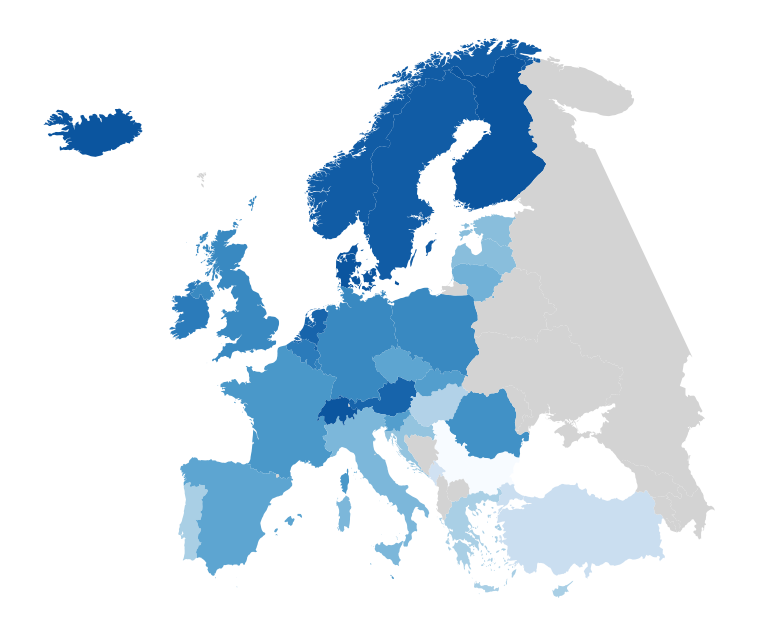

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

qol_data = pd.read_csv(r"..\data\overall_life_satisfaction\estat_ilc_pw01_filtered_en.csv", usecols= ['geo','TIME_PERIOD','OBS_VALUE'])
qol_data = qol_data.loc[qol_data['TIME_PERIOD'] == 2013]
qol_data.loc[qol_data['geo'] == 'Czechia', 'geo'] = 'Czech Republic'
qol_data.loc[qol_data['geo'] == 'Türkiye', 'geo'] = 'Turkey'
europe_map = gpd.read_file("..\data\europe_map\europe.geojson")

europe_map = europe_map.merge(qol_data, left_on='NAME', right_on='geo', how='left')
europe_map = europe_map.to_crs(epsg=4326)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
europe_map.plot(
    column='OBS_VALUE',
    cmap="Blues",
    legend=False,
    vmin= 5,
    vmax=8.5,
    missing_kwds={"color": "lightgrey"},
    ax=ax
)
ax.set_axis_off()
plt.show()